### Setup

In [44]:
import torch, torchvision
import argparse
import logging

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import math

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

In [45]:
print(torch.cuda.is_available())
# create logging configs
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s [%(levelname)s]: %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
)

True


In [46]:
data_path = "C:/Users/user/Desktop/RCP/ClimbAssistant/data"
test_path = os.path.join(data_path, 'test/images')
output_dir = os.path.join(data_path, 'output')

### Run inference with trained model

In [4]:
# set cofigurations
configs = {
    'classes': 1
            }

In [5]:
# settle the model configs
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.OUTPUT_DIR = output_dir
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
cfg.MODEL.ROI_HEADS.NUM_CLASSES = configs['classes']
predictor = DefaultPredictor(cfg)

[01/05 15:39:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from C:/Users/user/Desktop/RCP/ClimbAssistant/data\output\model_final.pth ...


2023-01-05 15:39:24 [INFO]: [Checkpointer] Loading from c:/Users/user/Desktop/RCP/ClimbAssistant/data\output\model_final.pth ...


In [6]:
# # get metadata from previous image runs
test_metadata = MetadataCatalog.get('val')

c:\Users\user\Desktop\RCP\ClimbAssistant\env\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


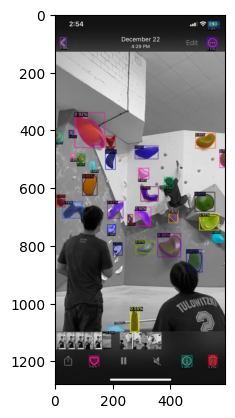

In [7]:
file = os.path.join(test_path, "img_1.jpg")
im = cv2.imread(file)

outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
v = Visualizer(im[:, :, ::-1],
                metadata= test_metadata, 
                scale=1, 
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

### Detect colour of each mask using BGR values

In [8]:
# Extract the contour of each predicted mask and save it in a list
contours = []
for pred_mask in outputs['instances'].pred_masks:
    # pred_mask is of type torch.Tensor, and the values are boolean (True, False)
    # Convert it to a 8-bit numpy array, which can then be used to find contours
    mask = pred_mask.cpu().numpy().astype('uint8')
    contour, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    contours.append(contour[0]) # contour is a tuple (OpenCV 4.5.2), so take the first element which is the array of contour points

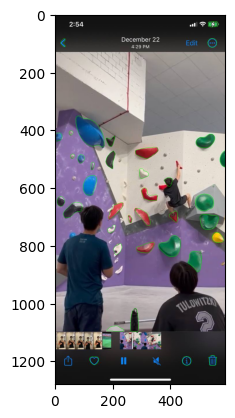

In [9]:
output_img = im.copy()

# draw the contours we have obtained from our model
for contour in contours:
    cv2.drawContours(output_img, [contour], -1, (0,255,0), 1)

plt.imshow(output_img[:, :, ::-1])
plt.show()

In [10]:
# these are the color configs used to find the mean colour of each hold we found
# since we are using OpenCV, all colour values should be in BGR format

# define colors
red = np.array(["red",(0,0,255)],dtype=object)
green = np.array(["green",(0,255,0)],dtype=object)
# brown = np.array(["brown",(20,70,140)],dtype=object)
blue = np.array(["blue",(255,0,0)],dtype=object)
yellow = np.array(["yellow",(0,255,255)],dtype=object)
# black = np.array(["black",(0,0,0)],dtype=object)
# white = np.array(["black",(255,255,255)],dtype=object)

# to do - pink n purple

colors = np.array([red, green, blue, yellow])


match_color: green
mean_value: (90.2109647944101, 119.27492609513571, 43.25987637731792, 0.0)
rmse: 97.3494234870791


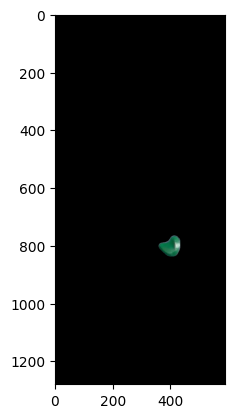


match_color: green
mean_value: (75.34992732558139, 106.62863372093022, 39.41642441860465, 0.0)
rmse: 98.7342027759983


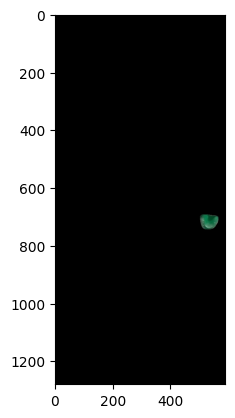


match_color: red
mean_value: (88.80361596009975, 77.11097256857855, 153.12593516209475, 0.0)
rmse: 89.83412377758368


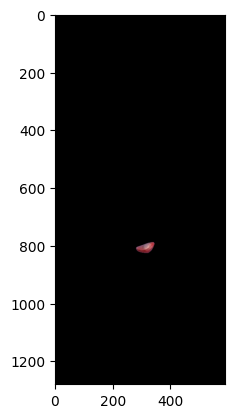


match_color: yellow
mean_value: (32.636920384951885, 163.18897637795277, 203.80314960629923, 0.0)
rmse: 63.549324992420345


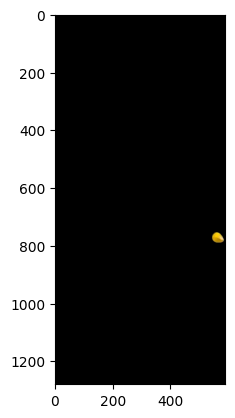


match_color: red
mean_value: (52.49686660698299, 46.45120859444942, 154.14458370635631, 0.0)
rmse: 70.9118015076959


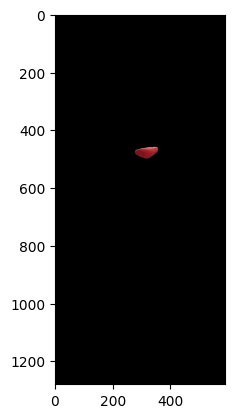


match_color: blue
mean_value: (199.13535031847135, 123.8343949044586, 29.961783439490446, 0.0)
rmse: 80.3192067363472


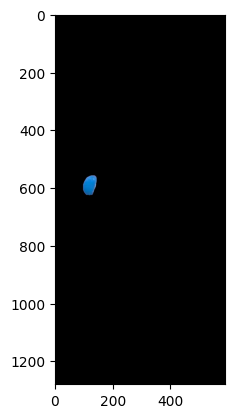


match_color: green
mean_value: (74.31680937359171, 107.26273095989184, 39.37449301487156, 0.0)
rmse: 98.14893363162984


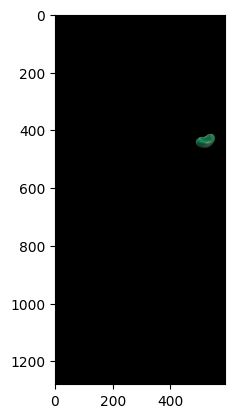


match_color: yellow
mean_value: (193.73107049608356, 192.6892950391645, 211.16057441253264, 0.0)
rmse: 120.18908278779439


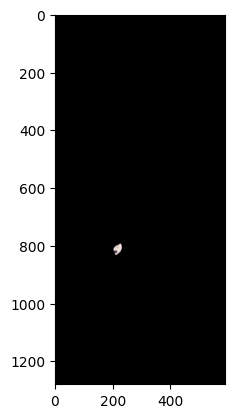


match_color: blue
mean_value: (83.40331491712706, 63.574585635359114, 74.88674033149171, 0.0)
rmse: 114.15657981856113


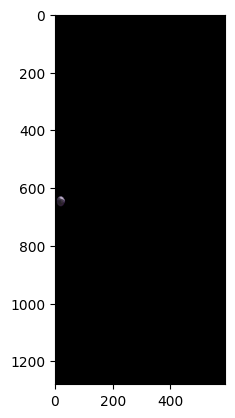


match_color: blue
mean_value: (154.58093525179856, 103.41007194244605, 80.22661870503597, 0.0)
rmse: 95.24344578130396


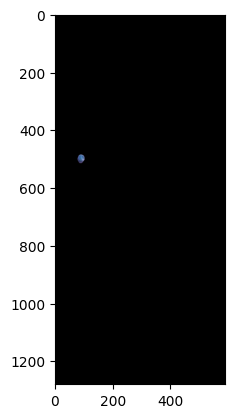


match_color: green
mean_value: (95.97289256198347, 133.3514049586777, 54.39140495867769, 0.0)
rmse: 94.81139473646353


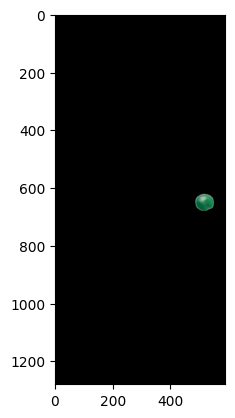


match_color: green
mean_value: (71.30552659019813, 110.67987486965589, 25.854014598540147, 0.0)
rmse: 94.1297096401293


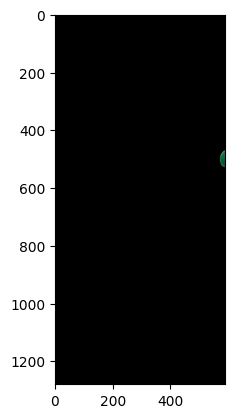


match_color: red
mean_value: (67.44912559618443, 69.85850556438793, 73.60651828298887, 0.0)
rmse: 118.78999754861395


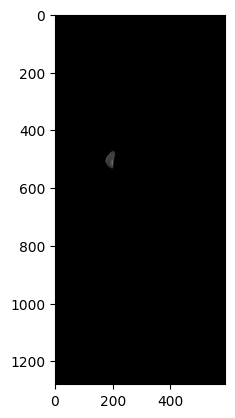


match_color: blue
mean_value: (127.3949208160936, 76.26480239691826, 27.37366243401341, 0.0)
rmse: 87.27102175259041


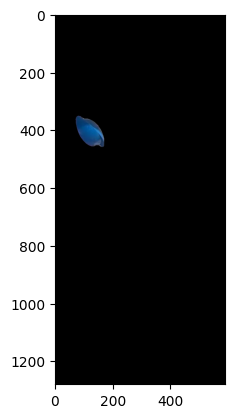


match_color: red
mean_value: (88.48189762796504, 83.29712858926342, 182.59675405742823, 0.0)
rmse: 81.66943096426901


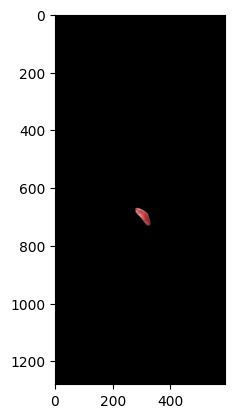


match_color: green
mean_value: (89.99589153656532, 121.85579293344288, 41.20829909613804, 0.0)
rmse: 95.78581015863855


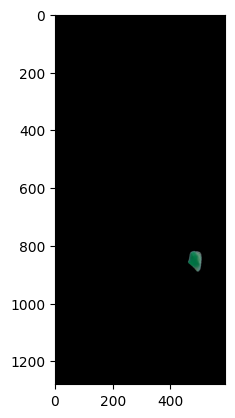


match_color: red
mean_value: (72.0758226037196, 61.287553648068666, 174.12231759656652, 0.0)
rmse: 71.8616447235436


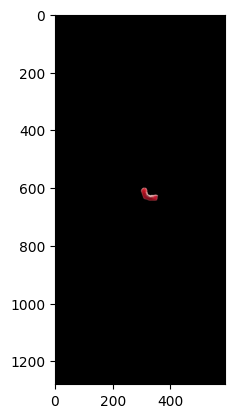


match_color: red
mean_value: (43.8531684698609, 46.69860896445131, 54.00772797527048, 0.0)
rmse: 121.79457278237484


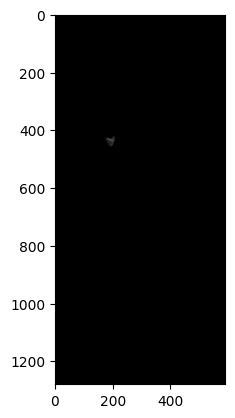


match_color: red
mean_value: (108.4090909090909, 103.23426573426573, 179.35314685314685, 0.0)
rmse: 96.83713303695386


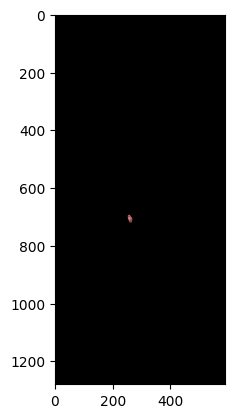


match_color: yellow
mean_value: (168.43036386449182, 184.25470514429108, 193.10915934755332, 0.0)
rmse: 111.36151395704121


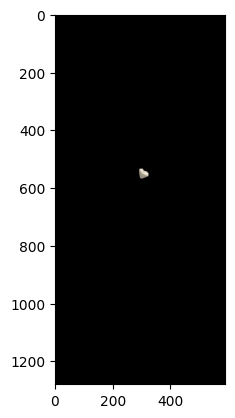


match_color: blue
mean_value: (150.16390728476821, 97.31291390728477, 58.89238410596027, 0.0)
rmse: 89.30980247544173


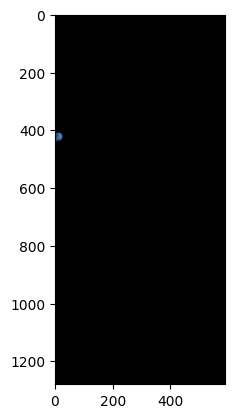


match_color: red
mean_value: (95.5681016231475, 87.39943542695836, 205.17784050811574, 0.0)
rmse: 80.1127766281968


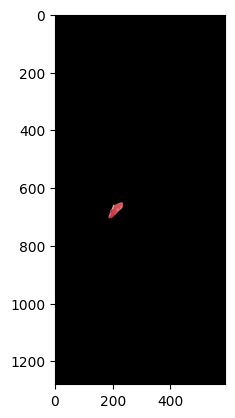


match_color: red
mean_value: (45.96259351620947, 41.02244389027431, 108.5498753117207, 0.0)
rmse: 91.72974785873183


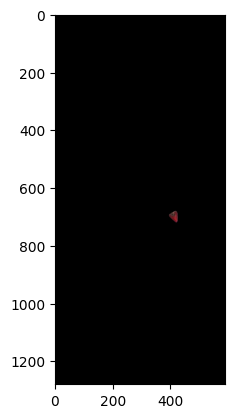


match_color: yellow
mean_value: (193.7765726681128, 182.26681127982647, 201.12798264642083, 0.0)
rmse: 123.47964894420068


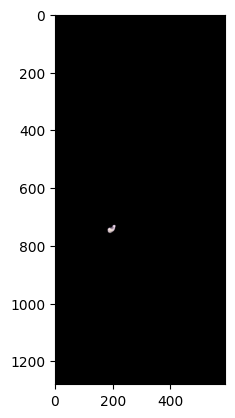


match_color: blue
mean_value: (83.76170212765958, 71.92482269503546, 77.05200945626477, 0.0)
rmse: 116.0929899393542


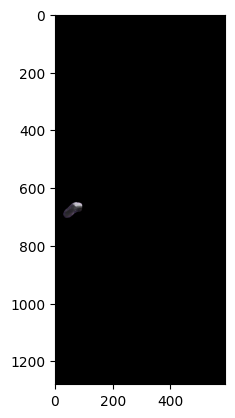


match_color: yellow
mean_value: (154.87078651685394, 133.32584269662922, 156.64606741573033, 0.0)
rmse: 127.09977331034784


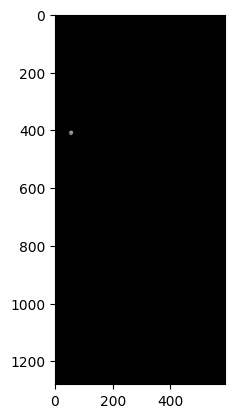


match_color: blue
mean_value: (98.05502392344498, 67.73325358851675, 37.430622009569376, 0.0)
rmse: 101.0289902641481


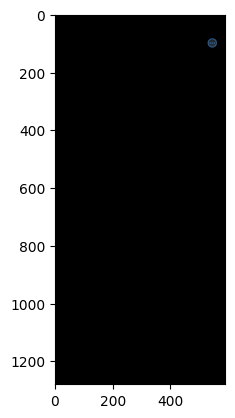


match_color: blue
mean_value: (87.31956257594167, 54.48359659781288, 23.56257594167679, 0.0)
rmse: 102.6975922761646


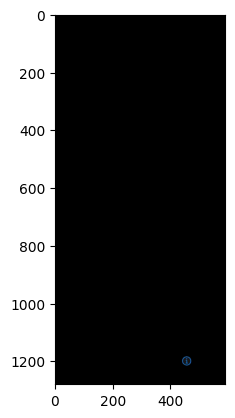


match_color: blue
mean_value: (108.63976608187134, 64.80818713450293, 21.56140350877193, 0.0)
rmse: 93.24933121028835


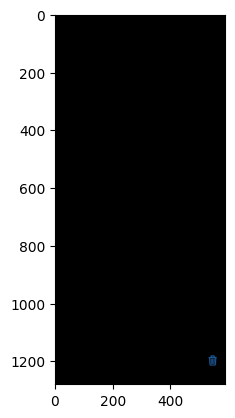


match_color: yellow
mean_value: (161.52173913043478, 141.17934782608694, 164.0163043478261, 0.0)
rmse: 125.59517765097848


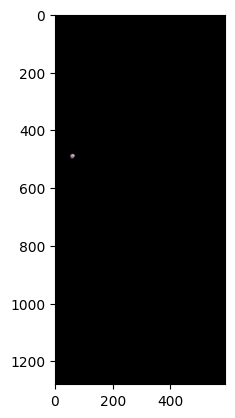


match_color: red
mean_value: (37.861198738170344, 41.40378548895899, 51.16876971608833, 0.0)
rmse: 122.05861196130324


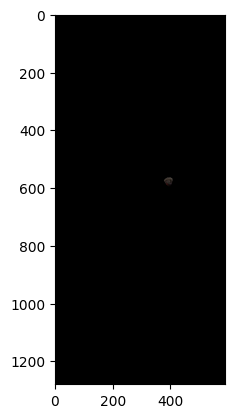


match_color: blue
mean_value: (80.06182795698925, 51.33467741935484, 24.51478494623656, 0.0)
rmse: 106.20669756730578


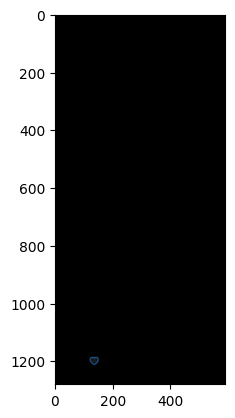


match_color: blue
mean_value: (152.78490566037735, 118.24528301886792, 136.7924528301887, 0.0)
rmse: 119.91948356900353


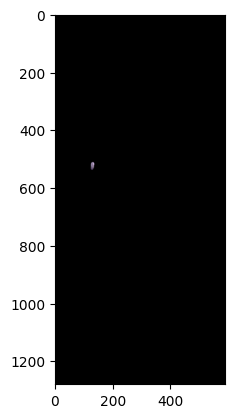


match_color: blue
mean_value: (125.56289308176102, 78.74842767295598, 30.89937106918239, 0.0)
rmse: 89.27495102359795


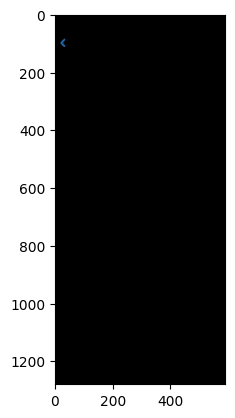


match_color: red
mean_value: (40.60188580408591, 36.895756940806706, 41.19539025667889, 0.0)
rmse: 127.43916347101595


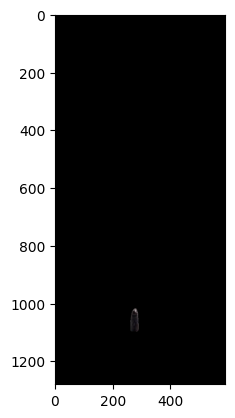


match_color: yellow
mean_value: (183.7127403846154, 182.43870192307693, 188.13341346153848, 0.0)
rmse: 120.39747139307472


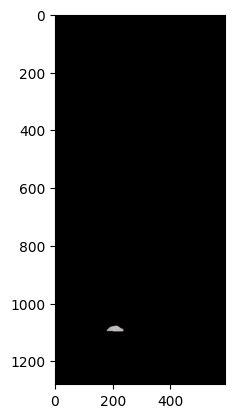


match_color: green
mean_value: (87.3952, 127.7008, 75.6656, 0.0)
rmse: 99.27787656713856


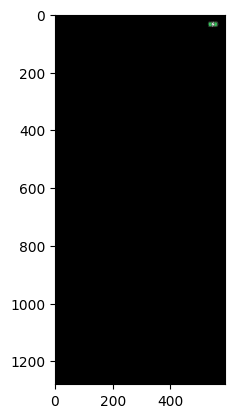

In [11]:
# compute mean color for region mask

# iterate through each mask we found from our model
for pred_mask in outputs['instances'].pred_masks:
    mask = pred_mask.cpu().numpy().astype('uint8') # extract mask from predictions

    mean = cv2.mean(im, mask=mask) # calculate mean color of each mask

    ## to see color scheme of each mask
    # print(mean)
    # square = np.full((10, 10, 3), (mean[0], mean[1], mean[2]), dtype=np.uint8) / 255.0
    # plt.imshow(square)
    # plt.show()

    # get the mean for each color channel
    blue_mean = mean[0]
    green_mean = mean[1]
    red_mean = mean[2]
    # pre-define a high number for RMSE
    min_rmse = 1000000

    # for each color category, we calculate the RMSE for it versus our masked portion
    for color in colors:
        bb = color[1][0]
        gg = color[1][1]
        rr = color[1][2]
        rmse = math.sqrt( ( (red_mean-rr)*(red_mean-rr) + (green_mean-gg)*(green_mean-gg) + (blue_mean-bb)*(blue_mean-bb) )/3 )
        colorname = color[0]

        # if the RMSE for that color is the lowest, we define it as the lowest and save its color as a match
        if rmse < min_rmse:
            min_rmse = rmse
            match_color = color[0]
    print("")
    print("match_color:", match_color)
    print("mean_value:", mean)
    print("rmse:", min_rmse)

    res = cv2.bitwise_and(im,im,mask = mask) # get only the masked portion of the image
    plt.imshow(res[:, :, ::-1]) # convert BGR format in opencv to RGB
    plt.show()

### Try using HSV channel instead

(-0.5, 590.5, 1279.5, -0.5)

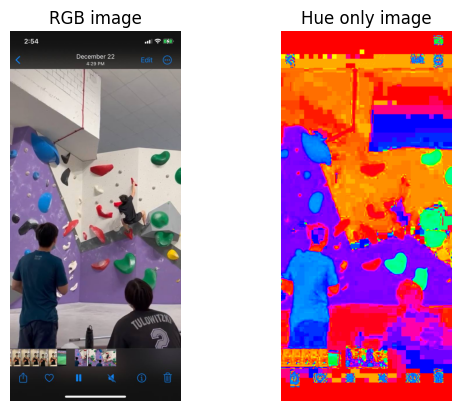

In [12]:
hsv_frame = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
hsv_only = hsv_frame.copy()
hsv_only[:, :, 1] = 255
hsv_only[:, :, 2] = 255
fig, ax = plt.subplots(1, 2)
ax[0].set_title('RGB image')
ax[0].imshow(im[:, :, ::-1])
ax[1].set_title('Hue only image')
ax[1].imshow(cv2.cvtColor(hsv_only, cv2.COLOR_HSV2RGB))
ax[0].axis('off')
ax[1].axis('off')

#### Code for equalize histogram

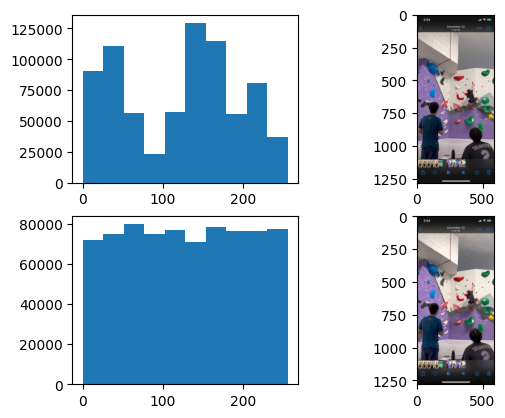

In [13]:
def equalize(img_hsv):
    pixelsValueChannel = img_hsv[:,:,2]
    plt.subplot(221)
    plt.hist(pixelsValueChannel.flatten())
    plt.subplot(222)
    plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)[:, :, ::-1])
    plt.subplot(223)
    new_valuechannel = cv2.equalizeHist(pixelsValueChannel)
    plt.hist(new_valuechannel.flatten())
    plt.subplot(224)
    img_hsv_new = img_hsv.copy()
    # adding the new value channel to the image
    img_hsv_new[:,:,2] = new_valuechannel
    plt.imshow(cv2.cvtColor(img_hsv_new, cv2.COLOR_HSV2BGR)[:, :, ::-1])

    
equalize(hsv_frame)

#### code for KMeans clustering to find most common colors

In [36]:
import sklearn
from sklearn.cluster import KMeans

clt = KMeans(n_clusters=3)
clt.fit(im.reshape(-1,3))
clt.cluster_centers_

array([[138.36225739, 118.7505451 , 130.41830588],
       [194.68285268, 201.30894041, 210.56104516],
       [ 38.95420489,  34.50847481,  30.99656857]])

In [41]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(5,5))
    ax[0].imshow(img_1[:, :, ::-1])
    ax[1].imshow(img_2[:, :, ::-1])
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

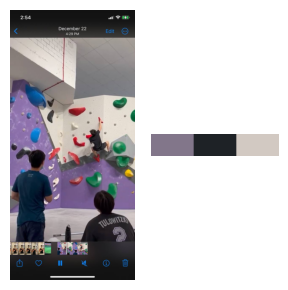

In [40]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(im.reshape(-1, 3))
show_img_compar(im, palette(clt_1))

In [ ]:
clt = KMeans(n_clusters=3)

for pred_mask in outputs['instances'].pred_masks:
    mask = pred_mask.cpu().numpy().astype('uint8') # extract mask from predictions

    mean = cv2.mean(im, mask=mask)
    hsv_mean = cv2.mean(hsv_frame, mask=mask) # calculate mean HSV values of each mask
    print(f'BGR mean: {mean}')
    print(f'HSV mean: {hsv_mean}')
    res = cv2.bitwise_and(im,im,mask = mask) # get only the masked portion of the image

    # get hue and value
    # hue is between 0 and 180, value is between 0 and 255
    hue = hsv_mean[0]
    value = hsv_mean[2]

    # make use of hue to categorize colours
    color = "Undefined"
    if hue < 60:
        color = "YELLOW"
    elif hue < 90:
        color = "GREEN"
    elif hue < 120:
        color = "BLUE"
    else:
        color = "RED"
    
    # however, value is used to determine black and white, and hue is not useful
    # hence we reset the color if any of the holds are too dark or light as they should be classified as black and white respectively
    if value < 100:
        color = "BLACK"
    elif value > 185:
        color = "WHITE"

    print(f'colour: {color}')

    # plt.imshow(res[:, :, ::-1]) # convert BGR format in opencv to RGB

    clt_1 = clt.fit(res.reshape(-1, 3))
    show_img_compar(res, palette(clt_1))

    plt.show()

### HSV colour categorization

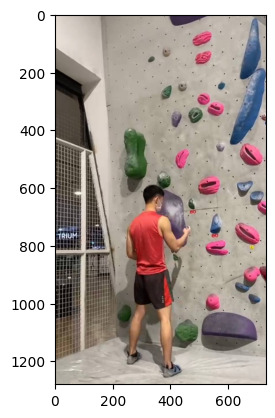

In [70]:
file = os.path.join(test_path, "img_7.jpg")
im = cv2.imread(file)
hsv_frame = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

plt.imshow(im[:, :, ::-1]) # convert BGR format in opencv to RGB
plt.show()

outputs = predictor(im)

BGR mean: (111.32932263814617, 86.0204991087344, 184.10338680926915, 0.0)
HSV mean: (171.96991978609626, 140.71278966131908, 184.10338680926915, 0.0)
colour: RED


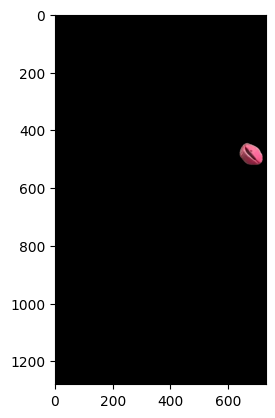

BGR mean: (108.05201793721973, 84.26793721973094, 179.05829596412556, 0.0)
HSV mean: (167.50739910313902, 138.65919282511211, 179.05829596412556, 0.0)
colour: WHITE


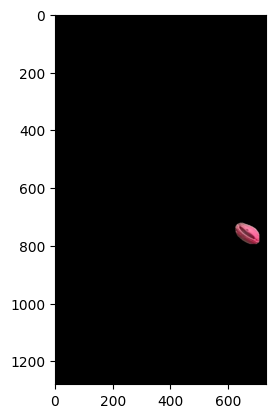

BGR mean: (98.07648725212465, 73.85346381663663, 175.14679371619883, 0.0)
HSV mean: (168.43651815606492, 151.87561164048418, 175.14679371619883, 0.0)
colour: RED


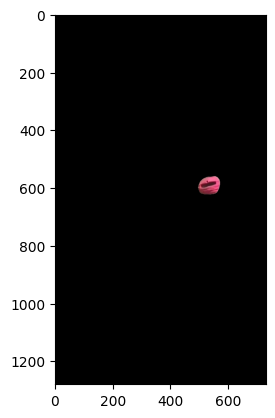

BGR mean: (83.56454248366013, 101.57761437908498, 87.19607843137256, 0.0)
HSV mean: (50.74591503267974, 54.243464052287585, 102.14297385620915, 0.0)
colour: YELLOW


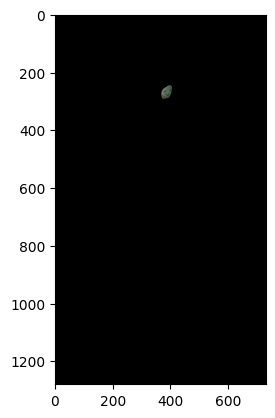

BGR mean: (79.75964252116651, 99.85747883349012, 90.34289746001882, 0.0)
HSV mean: (41.87441204139229, 71.59454374412041, 100.47789275634996, 0.0)
colour: YELLOW


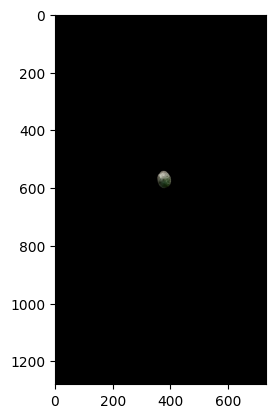

BGR mean: (114.66290103931316, 84.99457749661094, 194.2214188883868, 0.0)
HSV mean: (166.06461816538635, 144.4586534116584, 194.2214188883868, 0.0)
colour: RED


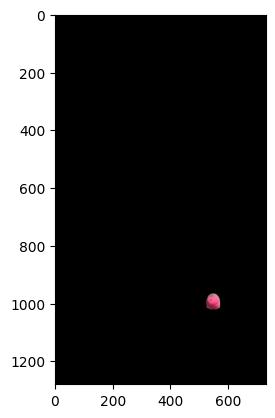

BGR mean: (113.61578947368422, 81.32488038277512, 186.55358851674643, 0.0)
HSV mean: (171.0, 148.53253588516748, 186.55358851674643, 0.0)
colour: RED


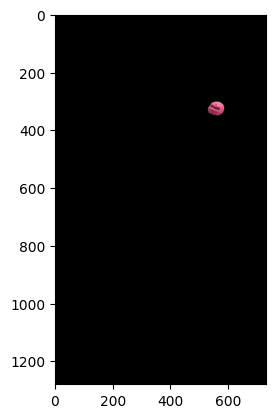

BGR mean: (115.35510771369006, 79.39819318971507, 192.5802640722724, 0.0)
HSV mean: (170.60319666435024, 152.62612925642807, 192.5802640722724, 0.0)
colour: RED


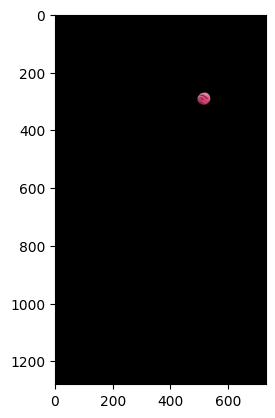

BGR mean: (108.97260273972603, 98.8027397260274, 110.32054794520548, 0.0)
HSV mean: (136.7472602739726, 33.59315068493151, 112.08013698630137, 0.0)
colour: RED


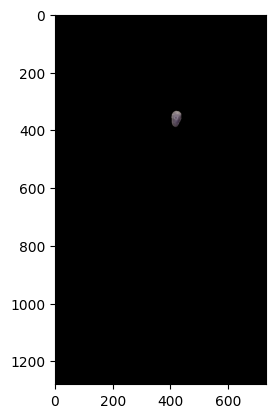

BGR mean: (78.4761663286004, 96.16784989858012, 85.38793103448276, 0.0)
HSV mean: (47.23123732251521, 52.746957403651116, 96.34634888438134, 0.0)
colour: BLACK


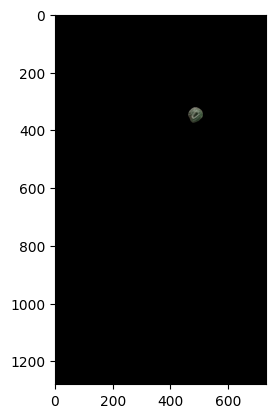

BGR mean: (107.38857436953167, 83.89706639217705, 195.18939783839426, 0.0)
HSV mean: (172.79310344827587, 147.07411219763253, 195.18939783839426, 0.0)
colour: RED


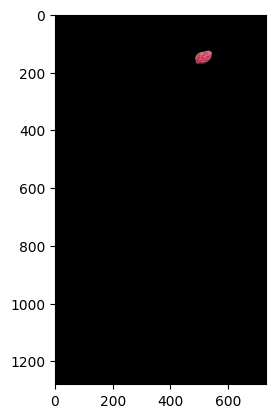

BGR mean: (112.41989664082688, 83.2609819121447, 198.62618432385875, 0.0)
HSV mean: (172.3139534883721, 148.85443583118, 198.62618432385875, 0.0)
colour: RED


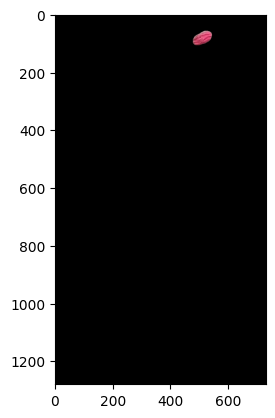

BGR mean: (29.70696324951644, 54.00145067698259, 40.3389748549323, 0.0)
HSV mean: (45.554642166344294, 121.93520309477756, 54.02079303675048, 0.0)
colour: BLACK


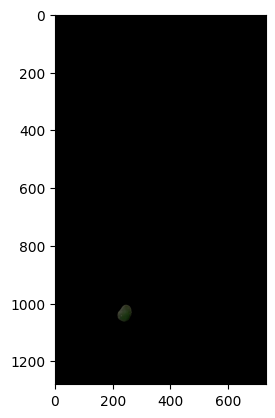

BGR mean: (127.43232413178984, 85.38735529830811, 211.21593944790737, 0.0)
HSV mean: (170.28183437221728, 152.24487978628673, 211.21593944790737, 0.0)
colour: RED


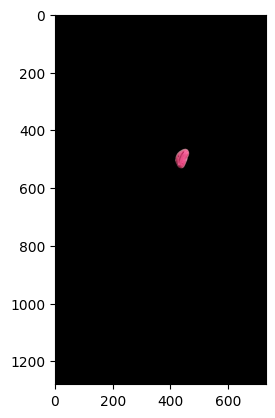

BGR mean: (118.03108808290156, 128.9896373056995, 143.79922279792746, 0.0)
HSV mean: (12.55699481865285, 48.137305699481864, 143.79922279792746, 0.0)
colour: YELLOW


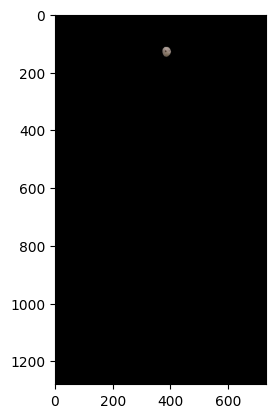

BGR mean: (116.31965174129353, 128.2002487562189, 136.3855721393035, 0.0)
HSV mean: (17.470149253731343, 41.41169154228856, 136.3855721393035, 0.0)
colour: YELLOW


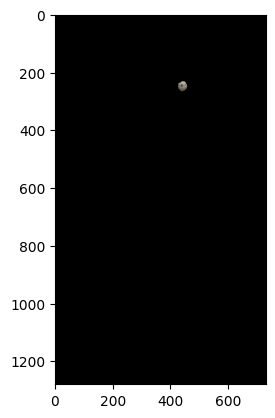

BGR mean: (119.81005586592178, 107.29888268156424, 102.9899441340782, 0.0)
HSV mean: (96.768156424581, 47.807262569832396, 122.76368715083798, 0.0)
colour: BLUE


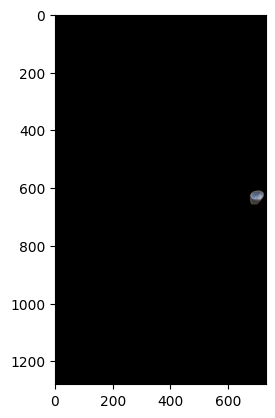

BGR mean: (140.8322056833559, 139.72259810554806, 150.0, 0.0)
HSV mean: (101.03518267929635, 21.87686062246279, 150.0, 0.0)
colour: BLUE


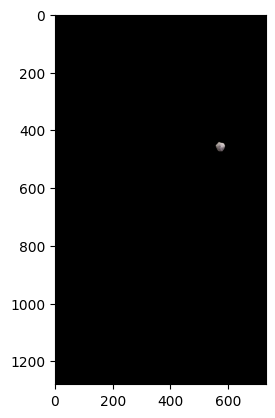

BGR mean: (108.30748175182481, 74.59671532846716, 169.88959854014598, 0.0)
HSV mean: (169.04653284671534, 146.88959854014598, 169.88959854014598, 0.0)
colour: RED


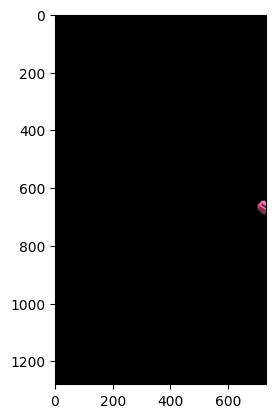

BGR mean: (101.13692946058092, 90.05186721991701, 71.25311203319502, 0.0)
HSV mean: (99.70746887966806, 82.16390041493776, 101.22614107883817, 0.0)
colour: BLUE


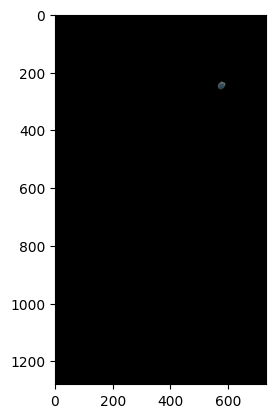

BGR mean: (125.24161650902838, 95.59802235597593, 201.47248495270853, 0.0)
HSV mean: (165.6779879621668, 132.84780739466896, 201.47248495270853, 0.0)
colour: WHITE


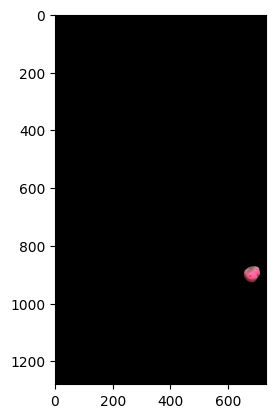

BGR mean: (139.86063072227873, 117.66988809766022, 106.40437436419124, 0.0)
HSV mean: (110.68463886063071, 75.47812817904374, 140.1495422177009, 0.0)
colour: BLUE


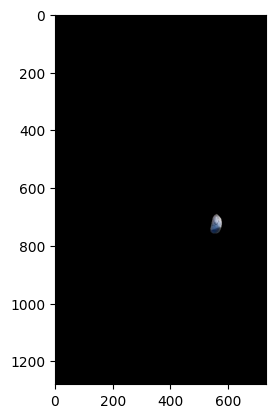

BGR mean: (74.63293051359517, 90.48036253776435, 86.95921450151057, 0.0)
HSV mean: (36.348942598187314, 60.1797583081571, 91.190332326284, 0.0)
colour: BLACK


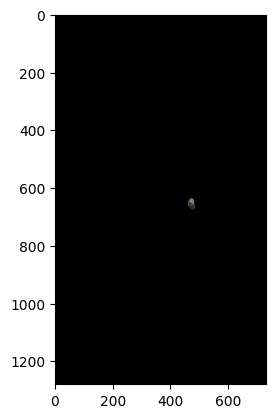

BGR mean: (67.33255517826825, 99.69376061120543, 77.84019524617996, 0.0)
HSV mean: (48.792869269949065, 86.12245331069609, 99.76082342954159, 0.0)
colour: BLACK


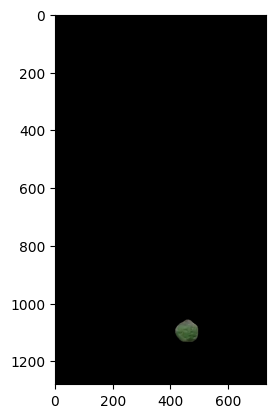

BGR mean: (77.42642642642643, 89.58258258258259, 90.35735735735736, 0.0)
HSV mean: (28.675675675675674, 39.8948948948949, 90.90390390390391, 0.0)
colour: BLACK


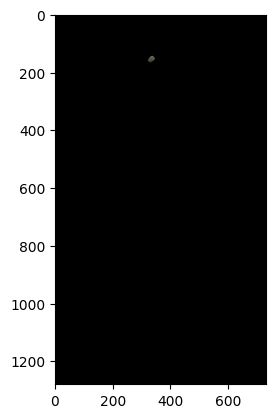

BGR mean: (95.49600798403193, 83.17465069860279, 77.16267465069859, 0.0)
HSV mean: (93.87924151696606, 53.73353293413173, 96.60079840319361, 0.0)
colour: BLACK


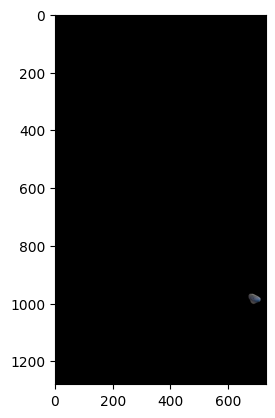

BGR mean: (126.73459958932239, 114.32392197125257, 110.60626283367557, 0.0)
HSV mean: (93.77104722792608, 43.10934291581109, 129.7063655030801, 0.0)
colour: BLUE


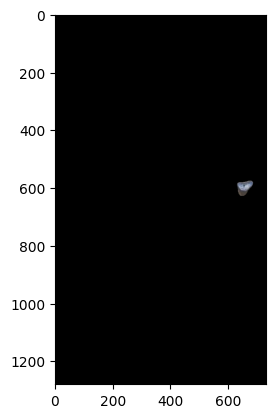

BGR mean: (57.39931565440548, 91.7442258340462, 67.9540633019675, 0.0)
HSV mean: (49.725834046193334, 103.95414884516681, 91.76090675791275, 0.0)
colour: BLACK


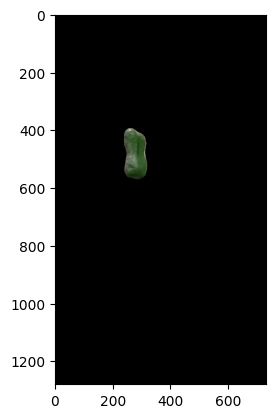

BGR mean: (115.12938525909237, 74.49243643385903, 186.22175732217573, 0.0)
HSV mean: (169.39974251689733, 157.41390408754427, 186.22175732217573, 0.0)
colour: RED


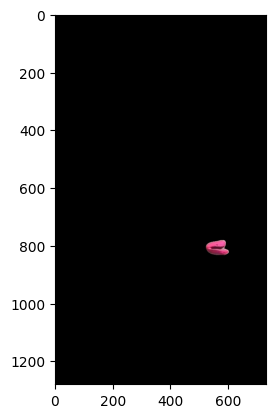

BGR mean: (95.6686541737649, 84.61499148211244, 77.89522998296422, 0.0)
HSV mean: (93.00766609880749, 53.41567291311755, 97.40204429301534, 0.0)
colour: BLACK


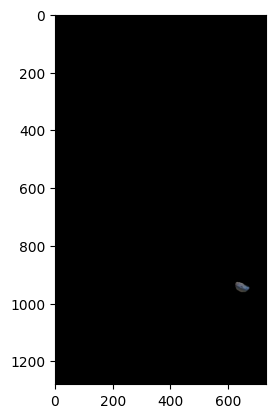

BGR mean: (57.97951344430217, 49.83098591549295, 112.82458386683739, 0.0)
HSV mean: (156.03072983354673, 149.7708066581306, 112.82458386683739, 0.0)
colour: RED


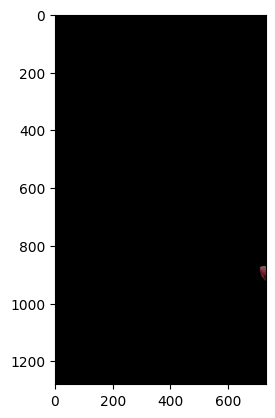

BGR mean: (90.3782782935119, 79.24268249378582, 89.0272916349617, 0.0)
HSV mean: (110.97554913001572, 43.7651296099021, 93.47187135392888, 0.0)
colour: BLACK


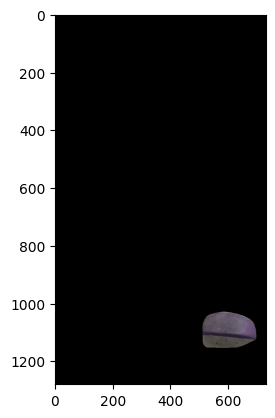

BGR mean: (94.30633802816902, 93.80985915492958, 176.65845070422534, 0.0)
HSV mean: (70.74295774647888, 124.59859154929578, 176.65845070422534, 0.0)
colour: WHITE


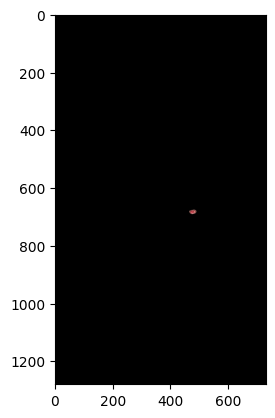

BGR mean: (125.62377590526076, 96.30801639717605, 76.25540879070827, 0.0)
HSV mean: (108.4854247324072, 108.04941926668185, 125.63425187884309, 0.0)
colour: BLUE


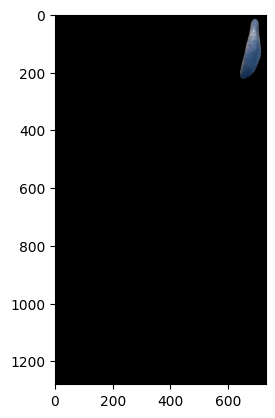

BGR mean: (127.0534863841739, 116.41702283551105, 131.0818170716815, 0.0)
HSV mean: (149.08047380632556, 33.42251801196727, 131.88142630357797, 0.0)
colour: RED


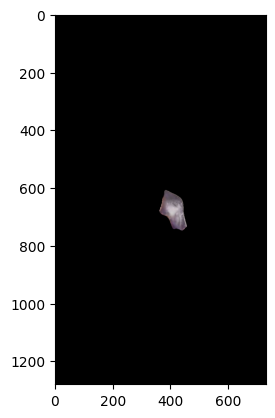

BGR mean: (126.9493670886076, 127.9493670886076, 155.5645569620253, 0.0)
HSV mean: (60.551898734177215, 58.12151898734177, 155.5645569620253, 0.0)
colour: GREEN


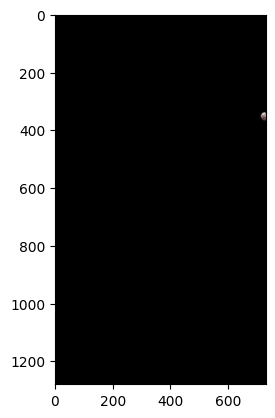

In [71]:
for pred_mask in outputs['instances'].pred_masks:
    mask = pred_mask.cpu().numpy().astype('uint8') # extract mask from predictions

    mean = cv2.mean(im, mask=mask)
    hsv_mean = cv2.mean(hsv_frame, mask=mask) # calculate mean HSV values of each mask
    print(f'BGR mean: {mean}')
    print(f'HSV mean: {hsv_mean}')
    
    res = cv2.bitwise_and(im,im,mask = mask) # get only the masked portion of the image

    # get hue and value
    # hue is between 0 and 180, value is between 0 and 255
    hue = hsv_mean[0]
    saturation = hsv_mean[1]
    value = hsv_mean[2]

    # make use of hue to categorize colours
    color = "Undefined"
    if hue < 60:
        color = "YELLOW"
    elif hue < 90:
        color = "GREEN"
    elif hue < 120:
        color = "BLUE"
    else:
        color = "RED"
    
    # however, value is used to determine black and white, and hue is not useful
    # hence we reset the color if any of the holds are too dark or light as they should be classified as black and white respectively
    if value < 100:
        color = "BLACK"
    elif saturation < 140 and value > 160:
        color = "WHITE"

    print(f'colour: {color}')

    plt.imshow(res[:, :, ::-1]) # convert BGR format in opencv to RGB

    plt.show()

(79.37516796560064, 173.8798710024187, 119.78607901101853, 0.0)


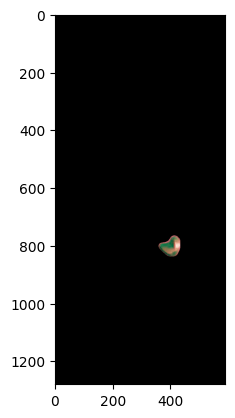

(75.57122093023256, 163.6046511627907, 106.62863372093022, 0.0)


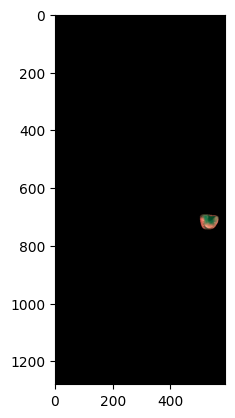

(157.15399002493766, 130.00124688279303, 153.1296758104738, 0.0)


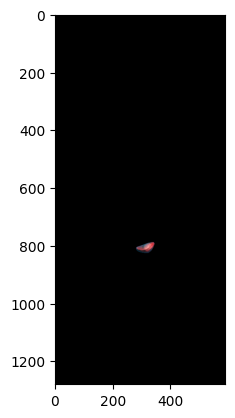

(22.68416447944007, 213.17235345581804, 203.80314960629923, 0.0)


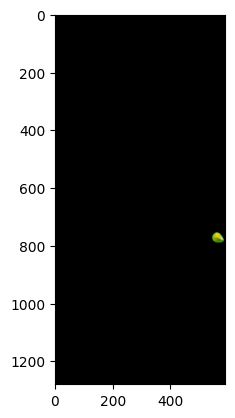

(150.401969561325, 184.35138764547895, 154.14458370635631, 0.0)


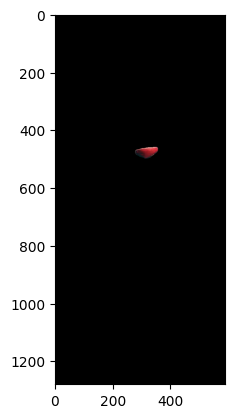

(103.85509554140128, 216.50597133757964, 199.13535031847135, 0.0)


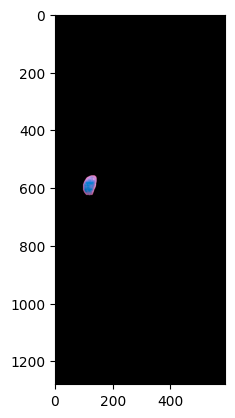

(74.65389815232086, 161.46732762505633, 107.26273095989184, 0.0)


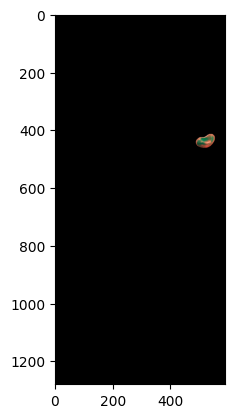

(84.94778067885117, 31.259791122715406, 211.49086161879896, 0.0)


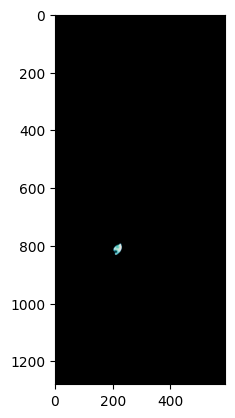

(138.61878453038673, 66.98066298342542, 83.45027624309392, 0.0)


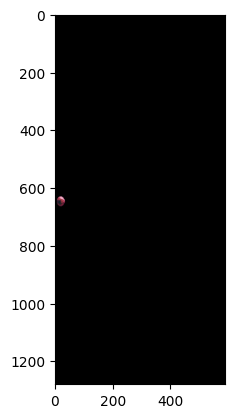

(112.38309352517986, 125.50539568345324, 154.58093525179856, 0.0)


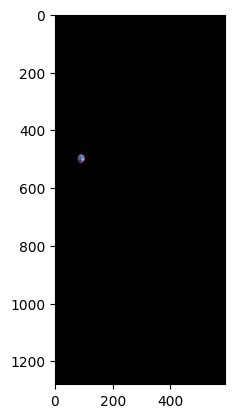

(75.49322314049587, 161.35669421487606, 133.3514049586777, 0.0)


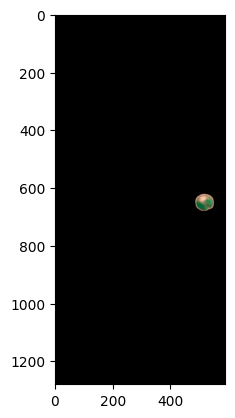

(75.7361835245047, 205.46402502606884, 110.67987486965589, 0.0)


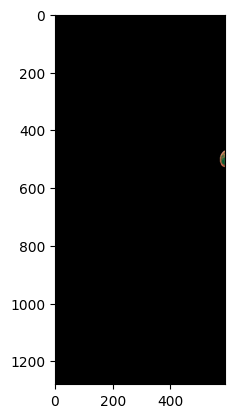

(26.310810810810814, 22.77027027027027, 73.70111287758347, 0.0)


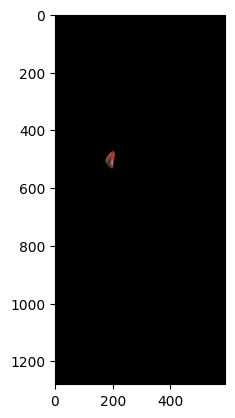

(106.25110572121558, 196.58738764445712, 127.3949208160936, 0.0)


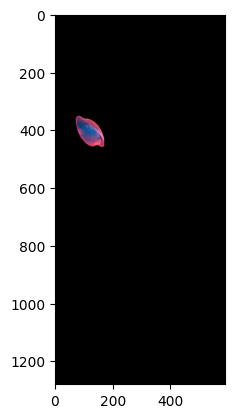

(137.7103620474407, 140.7147315855181, 182.59675405742823, 0.0)


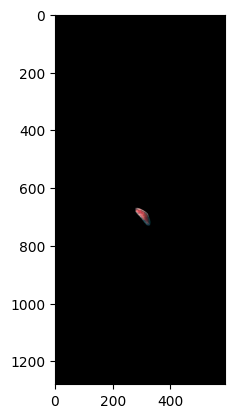

(79.28512736236647, 172.53697617091208, 122.39893179950698, 0.0)


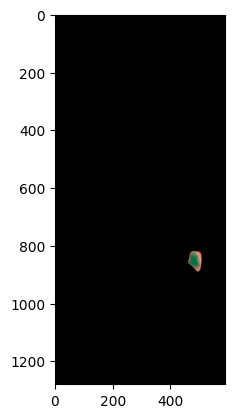

(155.21530758226038, 173.76466380543633, 174.12231759656652, 0.0)


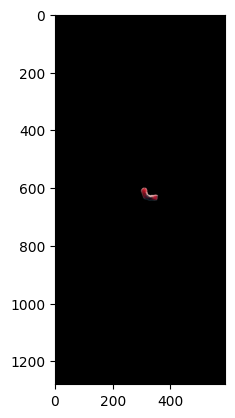

(10.250386398763524, 52.480680061823804, 54.00772797527048, 0.0)


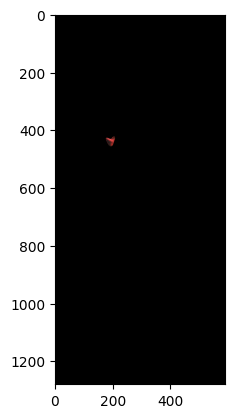

(138.6153846153846, 112.48251748251748, 179.35314685314685, 0.0)


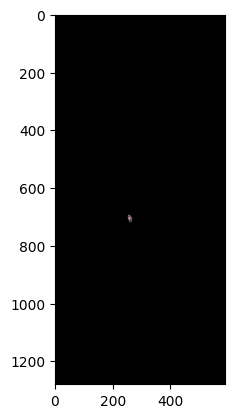

(19.43914680050188, 33.34755332496863, 193.10915934755332, 0.0)


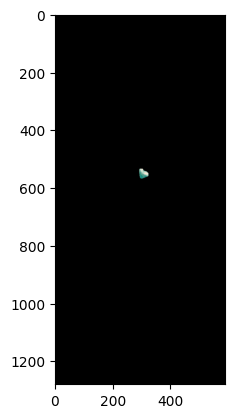

(108.16390728476821, 154.78476821192052, 150.16390728476821, 0.0)


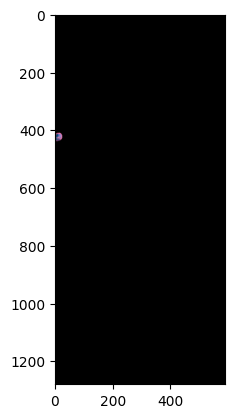

(143.89908256880736, 146.65702187720538, 205.17784050811574, 0.0)


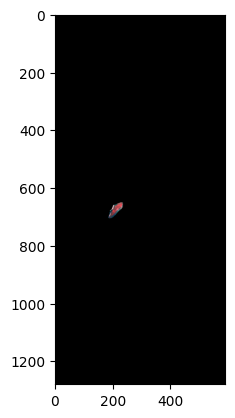

(125.77680798004987, 156.66334164588528, 108.5498753117207, 0.0)


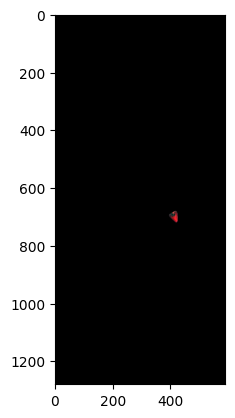

(117.70498915401302, 29.754880694143168, 203.0889370932755, 0.0)


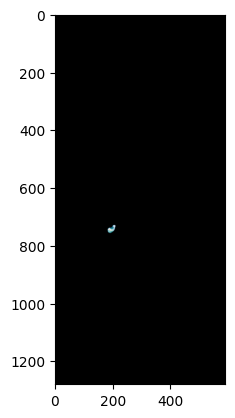

(129.24066193853426, 42.45862884160756, 83.92340425531914, 0.0)


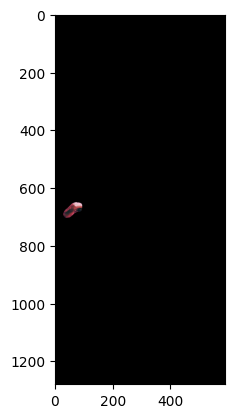

(153.80337078651684, 42.01123595505618, 159.24719101123594, 0.0)


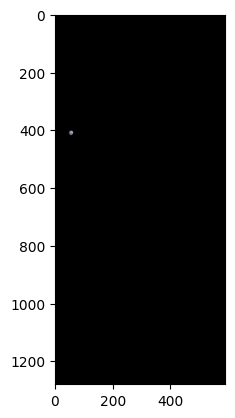

(93.688995215311, 151.20813397129186, 101.95334928229664, 0.0)


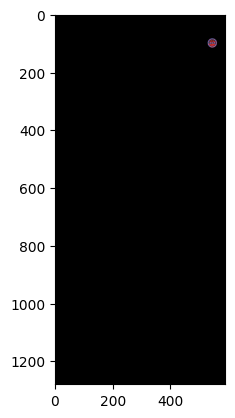

(95.06682867557714, 187.01701093560143, 90.42041312272174, 0.0)


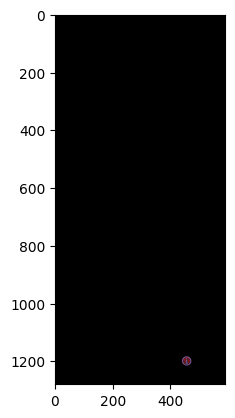

(104.73918128654971, 204.15321637426902, 108.9076023391813, 0.0)


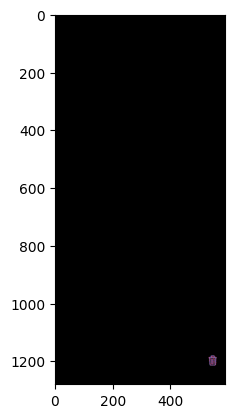

(155.82065217391303, 41.19565217391304, 167.5923913043478, 0.0)


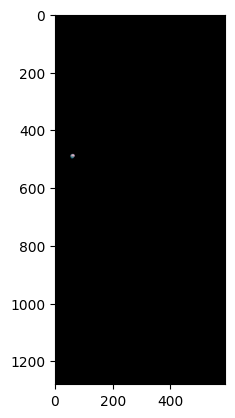

(33.86593059936909, 81.41640378548895, 51.178233438485805, 0.0)


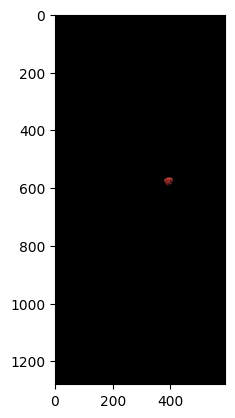

(92.43682795698925, 166.22849462365593, 82.79973118279571, 0.0)


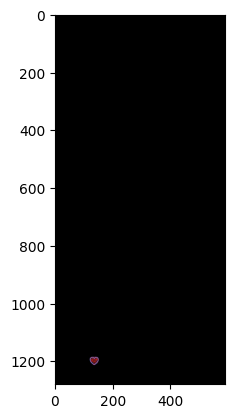

(136.1509433962264, 60.29811320754717, 152.78490566037735, 0.0)


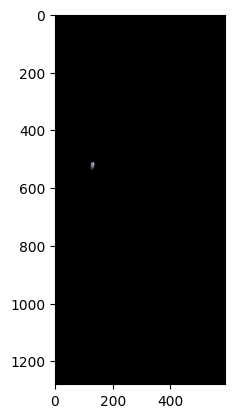

(97.4685534591195, 173.22641509433964, 127.55345911949686, 0.0)


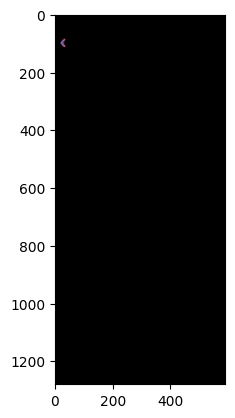

(146.17181770560504, 44.877946568884234, 42.48611838658984, 0.0)


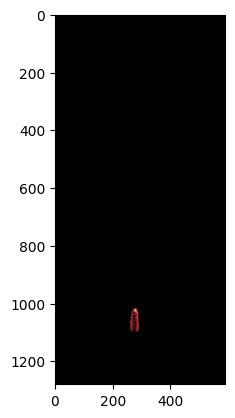

(148.046875, 8.686298076923077, 188.29927884615387, 0.0)


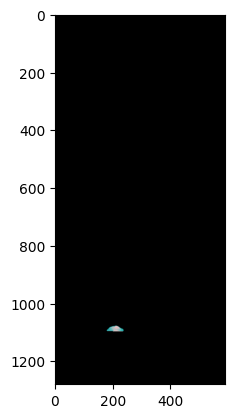

(68.0624, 124.2112, 129.4784, 0.0)


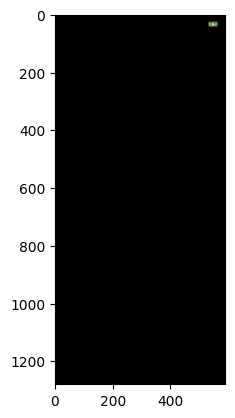

In [15]:
for pred_mask in outputs['instances'].pred_masks:
    mask = pred_mask.cpu().numpy().astype('uint8') # extract mask from predictions

    mean = cv2.mean(hsv_frame, mask=mask) # calculate mean HSV values of each mask
    print(mean)
    res = cv2.bitwise_and(im,im,mask = mask) # get only the masked portion of the image
    pixelsValueChannel = res[:,:,2]
    loc = np.where(mask != 0)
    values = pixelsValueChannel[loc]
    # print(values)
    new_valuechannel = cv2.equalizeHist(values)
    # print(new_valuechannel)
    for i, coord in enumerate(zip(loc[0], loc[1])):
        res[coord[0], coord[1]][2] = new_valuechannel[i][0]
    # print(res)
    plt.imshow(res[:, :, ::-1]) # convert BGR format in opencv to RGB
    plt.show()